In [1]:
import pandas as pd
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 


In [12]:
df = pd.read_csv("tictactoe.csv", delimiter=",")
df[0:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [13]:
feature_names = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9' ]].values
feature_names[0:5]

array([['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o'],
       ['x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'o'],
       ['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x'],
       ['x', 'x', 'x', 'x', 'o', 'o', 'o', 'b', 'b'],
       ['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b']], dtype=object)

In [16]:
class_names =[v10[0], v10[1]]
class_names

['negative', 'positive']

In [23]:
df['V1'],v1 = pd.factorize(df['V1'], sort=True)
df['V2'],v2 = pd.factorize(df['V2'], sort=True)
df['V3'],v3 = pd.factorize(df['V3'], sort=True)
df['V4'],v4 = pd.factorize(df['V4'], sort=True)
df['V5'],v5 = pd.factorize(df['V5'], sort=True)
df['V6'],v6 = pd.factorize(df['V6'], sort=True)
df['V7'],v7 = pd.factorize(df['V7'], sort=True)
df['V8'],v8 = pd.factorize(df['V8'], sort=True)
df['V9'],v9 = pd.factorize(df['V9'], sort=True)
df['V10'],v10 = pd.factorize(df['V10'], sort=True)
[v1, v2, v3, v4, v5, v6, v7, v8, v9, v10] 



[Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 Int64Index([0, 1], dtype='int64')]

In [24]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
5,2,2,2,2,1,1,0,0,1,1
6,2,2,2,2,1,0,1,1,0,1
7,2,2,2,2,1,0,1,0,1,1
8,2,2,2,2,1,0,0,1,1,1
9,2,2,2,2,0,1,1,1,0,1


In [25]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,1.222338,1.133612,1.222338,1.133612,1.311065,1.133612,1.222338,1.133612,1.222338,0.653445
std,0.775569,0.798966,0.775569,0.798966,0.740882,0.798966,0.775569,0.798966,0.775569,0.476121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [27]:

feature_names = ['V1','V2','V3','V4', 'V5', 'V6', 'V7', 'V8', 'V9']
x = df[feature_names] # Features
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
5,2,2,2,2,1,1,0,0,1
6,2,2,2,2,1,0,1,1,0
7,2,2,2,2,1,0,1,0,1
8,2,2,2,2,1,0,0,1,1
9,2,2,2,2,0,1,1,1,0


In [28]:
y = df['V10'] # Target
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
928    0
929    0
930    0
931    0
932    0
933    0
934    0
935    0
936    0
937    0
938    0
939    0
940    0
941    0
942    0
943    0
944    0
945    0
946    0
947    0
948    0
949    0
950    0
951    0
952    0
953    0
954    0
955    0
956    0
957    0
Name: V10, Length: 958, dtype: int64

In [30]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [31]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=80)
clf = clf.fit(X_trainset,y_trainset)

In [32]:
predictionTree = clf.predict(X_testset)

In [33]:
print (predictionTree [0:5])
print (y_testset [0:5])

[0 1 1 1 1]
632    0
554    1
549    1
290    1
206    1
Name: V10, dtype: int64


In [34]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predictionTree))
count_misclassified = (y_testset != predictionTree).sum()
print('Misclassified samples: {}'.format(count_misclassified))

DecisionTrees's Accuracy:  0.7256944444444444
Misclassified samples: 79


In [35]:
def plot_decision_tree(clf, features, classes):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

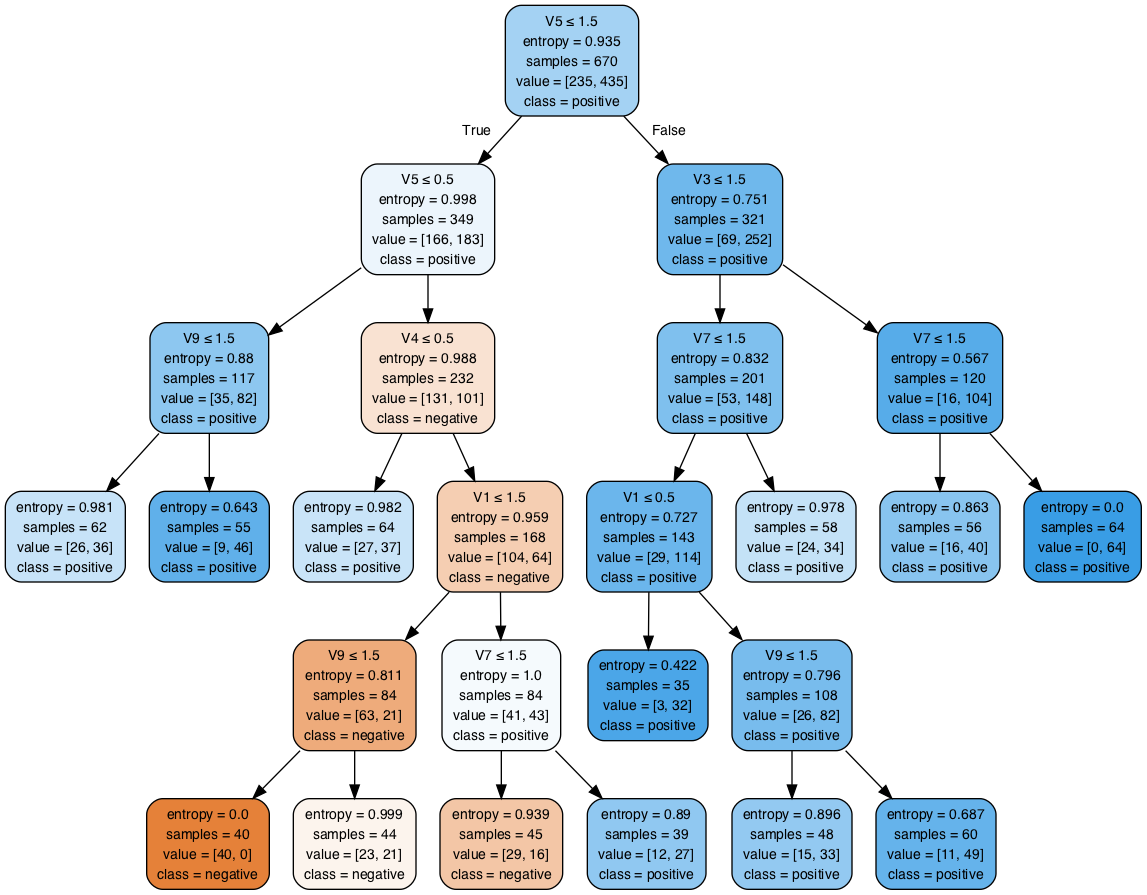

In [36]:
plot_decision_tree(clf, feature_names, class_names)